# Exploring the Relationship Between GISTEMP and the Frequency of Hurricanes (1992-2018)

### Introduction:
This report sets out to explore a fascinating and potentially urgent connection between the temperature of our planet's surface and the frequency of hurricanes. We're going to look at data from 1992 to 2018 to see if there's a relationship between how warm the Earth gets and how many hurricanes occur during those years. This might help us understand how changes in global temperatures could affect the occurrence of hurricanes, a crucial understanding for our future.

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import datetime



### Citation:

- GISTEMP Team, 2024: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.
- Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.
- www.epa.gov

In [313]:
gistemp_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df_temp = pd.read_csv(gistemp_url, skiprows=1)
#print(df_temp.columns)

In [314]:
df_temp['J-D'] = pd.to_numeric(df_temp['J-D'], errors='coerce')
df_temp = df_temp[(df_temp['Year'] >= 1992) & (df_temp['Year'] <= 2018)]

In [315]:
#plt.figure(figsize=(10, 6))
#plt.plot(df_temp['Year'], df_temp['J-D'], marker='o', linestyle='-', color='grey')
#plt.title('GISTEMP Over Years')
#plt.xlabel('Year')
#plt.ylabel('GISTEMP')
#plt.grid(False)
#plt.xticks(df_temp['Year'])
#plt.tight_layout()
#plt.show()

In [316]:
cyclone_url = "https://www.epa.gov/sites/default/files/2021-04/cyclones_fig-1.csv"

df_cyclone = pd.read_csv(cyclone_url, encoding='ISO-8859-1', skiprows=6)

#print(df_cyclone.info())
#print(df_cyclone.head())

In [317]:
filtered_df_cyclone = df_cyclone[(df_cyclone['Year'] >= 1992) & (df_cyclone['Year'] <= 2018)]

#print(filtered_df_cyclone.head(30))

In [318]:
#plt.figure(figsize=(10, 6))
#plt.plot(filtered_df_cyclone['Year'], filtered_df_cyclone['Total hurricanes (adjusted)'], marker='o', linestyle='-', color='blue')
#plt.title('Hurricanes Over Years')
#plt.xlabel('Year')
#plt.ylabel('Hurricanes')
#plt.grid(False)
#plt.xticks(df_temp['Year'])
#plt.tight_layout()
#plt.show()

In [319]:
data_major_Hurricane = {
    'Year': [2018, 2017, 2012, 2008, 2005, 2004, 1998, 1997, 1995 ],
    'Hurricane': ['Michael', 'Irma', 'Issac', 'Gustav', 'Katrina', 'Ivan', 'Georges', 'Danny', 'Allison']
}

df_major_hurricane = pd.DataFrame(data_major_Hurricane)
#print(df_major_hurricane)

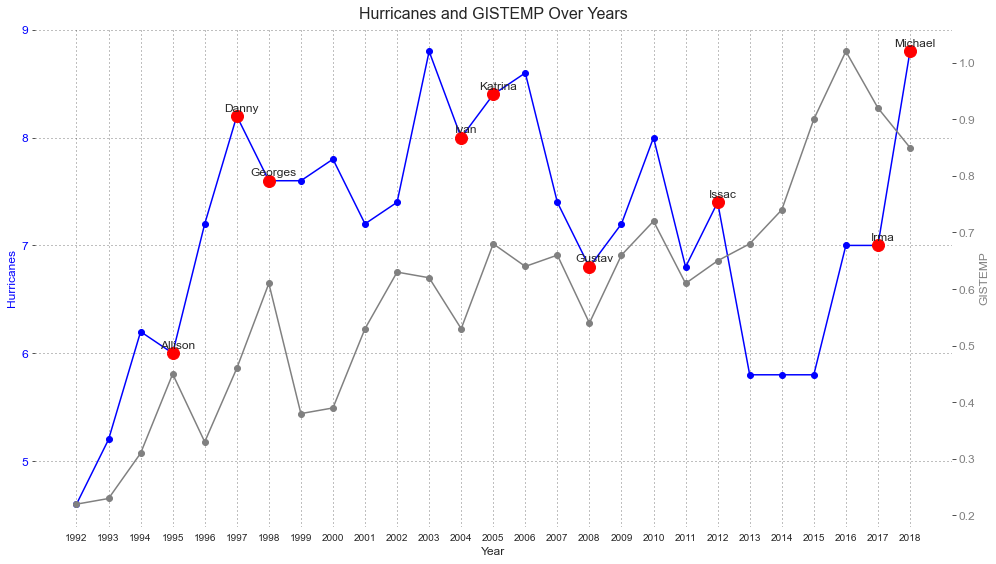

In [320]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(filtered_df_cyclone['Year'], filtered_df_cyclone['Total hurricanes (adjusted)'], marker='o', linestyle='-', color='blue', label='Hurricanes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Hurricanes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

for index, row in df_major_hurricane.iterrows():
    hurricane = row['Hurricane']
    year = row['Year']
    if year in filtered_df_cyclone['Year'].values:
        temp_index = filtered_df_cyclone[filtered_df_cyclone['Year'] == year].index[0]
        ax1.plot(year, filtered_df_cyclone.loc[temp_index, 'Total hurricanes (adjusted)'], marker='o', markersize=12, color='red', label=hurricane)
        ax1.annotate('\n'.join([h for h in hurricane.split()]), (year, filtered_df_cyclone.loc[temp_index, 'Total hurricanes (adjusted)']), textcoords="offset points", xytext=(5,5), ha='center', fontsize=12)


ax2 = ax1.twinx()
ax2.plot(df_temp['Year'], df_temp['J-D'], marker='o', linestyle='-', color='grey', label='GISTEMP')
ax2.set_ylabel('GISTEMP', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('Hurricanes and GISTEMP Over Years')
plt.grid(False)
plt.xticks(df_temp['Year'])
plt.tight_layout()
plt.show()

In [321]:

merged_df = pd.merge(filtered_df_cyclone, df_temp, on='Year')

selected_columns = merged_df[['Year', 'Total hurricanes (adjusted)', 'J-D']]
#print(selected_columns)

### Results:
So, what did we uncover? Well, it's quite intriguing. It turns out that there seems to be a link, a fascinating correlation, between how warm the Earth gets (as measured by GISTEMP) and how many hurricanes we see. When there are lots of hurricanes in a particular year, it often coincides with the Earth's surface being warmer during that same year or in the following years. This suggests that when our planet heats up, it might influence the number of hurricanes we experience.